In [34]:
import numpy as np # Referred video 11 codebasics loss or cost function.

In [2]:
y_predicted = np.array ([1,1,0,0,1])
y_true = np.array ([0.30,0.7,1,0,0.5])

## Mean Absolute Error

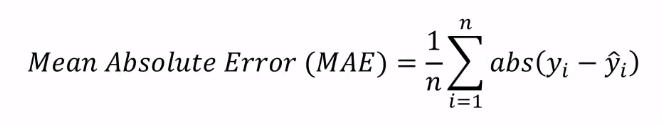

__Finding errors using python functions__ 

In [3]:
def mae(y_true, y_predicted):    
    total_loss= 0
    for i,j in zip(y_true,y_predicted):     # zip enables to print two arrays at once in a for loop
        print (i,j)                         # prints i and j array together 
        abs_error = abs(i-j)                      #abs converts values to positive
        total_loss += abs_error
    print (abs_error)
    print (f" Mean absolute error: {total_loss/len(y_true)} " )

In [4]:
mae(y_true,y_predicted) 

0.3 1
0.7 1
1.0 0
0.0 0
0.5 1
0.5
 Mean absolute error: 0.5 


__Finding errors using numpy__ 

In [5]:
(y_true-y_predicted)

array([-0.7, -0.3,  1. ,  0. , -0.5])

In [6]:
np.abs(y_true-y_predicted)

array([0.7, 0.3, 1. , 0. , 0.5])

In [7]:
np.mean(np.abs(y_true-y_predicted)) # Same value obtained as above 

0.5

__Just another method without using for loops__ 

In [8]:
def SSE(y_true, y_predicted):
    error = abs(y_true - y_predicted)
    sum_error = sum(error)/len(y_true)
    print (f"All errors:{error}")
    print (f"SSE: {sum_error}")

In [9]:
SSE(y_true, y_predicted)

All errors:[0.7 0.3 1.  0.  0.5]
SSE: 0.5


## Mean Squared Error

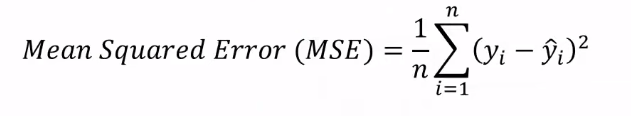

__Finding errors using python functions__ 

In [10]:
def mse(y_true, y_predicted):    
    total_loss= 0
    for i,j in zip(y_true,y_predicted):     # zip enables to print two arrays at once in a for loop
        print (i,j)                         # prints i and j array together 
        abs_error = (i-j)**2                      #abs converts values to positive
        total_loss += abs_error
    print (f" Mean squared error: {total_loss/len(y_true)} " )

In [11]:
mse(y_true,y_predicted) 

0.3 1
0.7 1
1.0 0
0.0 0
0.5 1
 Mean squared error: 0.366 


__Finding errors using numpy__

In [12]:
(y_true-y_predicted)

array([-0.7, -0.3,  1. ,  0. , -0.5])

In [13]:
np.abs((y_true-y_predicted)**2)

array([0.49, 0.09, 1.  , 0.  , 0.25])

In [14]:
np.mean((y_true-y_predicted)**2)

0.366

In [15]:
np.mean(np.abs(y_true-y_predicted)**2) # Same value obtained as above 

0.366

__Just another method without using For Loops__ 

In [16]:
def SSE(y_true, y_predicted):
    error = (y_true - y_predicted)**2
    sum_error = sum(error)/len(y_true)
    print (f"All errors:{error}")
    print (f"SSE: {sum_error}")

In [17]:
SSE(y_true, y_predicted)

All errors:[0.49 0.09 1.   0.   0.25]
SSE: 0.366


# Log Loss / binary cross entropy

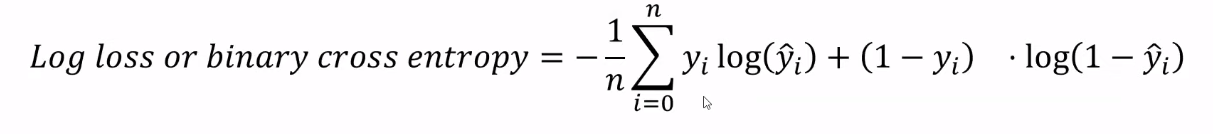

__Calculating Log Loss Manually__

In [18]:
import math
math.log(1) # Shows 0
# math.log(0) # shows error (infinity)

0.0

In [19]:
# np.log([1]) # Same as above using numpy 
np.log([0]) # Returns [inf] 

C:\Users\DELL\AppData\Local\Temp\ipykernel_4168\3291452945.py:2: RuntimeWarning: divide by zero encountered in log
  np.log([0]) # Returns [inf]


array([-inf])

In [20]:
 np.log(y_predicted)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4168\1392610639.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_predicted)


array([  0.,   0., -inf, -inf,   0.])

Observe how log(y_predicted) is showing (0.-inf) which is not what we are looking for and hence implementing this values in our cost function is not at all feasible. We need to look for some alternatve to tackle this. One thing we can do is replace 0 and 1 with values near to both of them.

    For example 0 can be replaced with 0.00000001 apprx.
    1 can be replaced with 0.999999 apprx. 
    Doing this we will be able to use the log in our cost function, which removes the bias.

In [21]:
y_predicted

array([1, 1, 0, 0, 1])

In [22]:
epsilon = 1e-15

In [23]:
epsilon

1e-15

In [24]:
y_predicted_new = [max(i,epsilon) for i in y_predicted ] # replacing 0 with value very near to it
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [25]:
y_predicted_new = [min (i, 1-epsilon) for i in y_predicted_new] # replacing 1 with value very near to it
y_predicted_new # observe that it returned list and is not a numpy array 

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [29]:
y_predicted_new = np.array(y_predicted_new) 
# We need to convert list to numpy array, else the line next to image below will throw this error
# TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [30]:
np.log(y_predicted_new) # Just checking log values after altering the y_predicted.

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

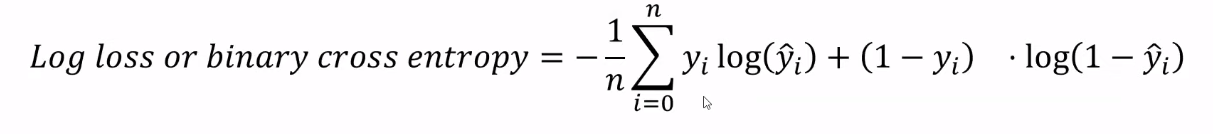

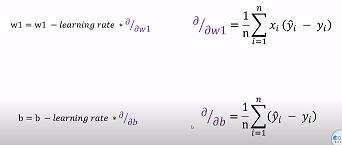

https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d
How partial derivative of log loss function is calculated ?

In [31]:
-np.mean(y_true* np.log(y_predicted_new)+ (1-y_true)*np.log(1-y_predicted_new))

17.2696280766844

__Calculating log loss using function__

In [32]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted ]
    y_predicted_new = [min (i, 1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new) 
    return -np.mean(y_true* np.log(y_predicted_new)+ (1-y_true)*np.log(1-y_predicted_new))

In [33]:
log_loss(y_true, y_predicted)

17.2696280766844